In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Creating path variable to read train data
RAW_DATA_PATH = os.path.abspath(os.path.join(os.getcwd(),os.path.pardir,'data','raw','train.csv'))

In [3]:
# Creating path variable to read test data
RAW_DATA_PATH_TEST = os.path.abspath(os.path.join(os.getcwd(),os.path.pardir,'data','raw','test.csv'))

In [4]:
# Creating package path
PACKAGE_PATH = os.path.abspath(os.path.join(os.getcwd(),os.path.pardir,'packages'))

In [5]:
# adding package path to path variable
sys.path.insert(1, PACKAGE_PATH)

In [6]:
# import functions from user defined packages
from eda import get_class_counts, normality_plots

In [7]:
from utils import load_all_transactions

In [8]:
df = load_all_transactions('train.csv')


Ther are a toral of 50660 transactions and Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object') features 



In [9]:
# having a peek at data
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [10]:
# getting info about training set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50660 entries, 0 to 50659
Data columns (total 12 columns):
ID                      50660 non-null int64
Agency                  50660 non-null object
Agency Type             50660 non-null object
Distribution Channel    50660 non-null object
Product Name            50660 non-null object
Claim                   50660 non-null int64
Duration                50660 non-null int64
Destination             50660 non-null object
Net Sales               50660 non-null float64
Commision (in value)    50660 non-null float64
Gender                  14614 non-null object
Age                     50660 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [11]:
# checking is there any null values in the dataframe
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  36046
Age                         0
dtype: int64

**Insights**
1. There are null values in Gender column

In [12]:
df.nunique()

ID                      50660
Agency                     16
Agency Type                 2
Distribution Channel        2
Product Name               26
Claim                       2
Duration                  444
Destination               144
Net Sales                1053
Commision (in value)      968
Gender                      2
Age                        88
dtype: int64

**Insighst**
1. Agency type, distribution channel, gender are categorical variables. 
2. Claim is target variable
3. Agency type, distribution channel, claim, Gender have only 2 unique values. So label encoding for these values can be enough
4. Agency and product name have 16 and 26 unique values, so one hot encoding can be done

In [13]:
# Lest look at the Agency Type column
df['Agency Type'].value_counts()

Travel Agency    36672
Airlines         13988
Name: Agency Type, dtype: int64

**Insights**
1. 36,672 customers prefer to travel with Travel Agency
2. 13,988 (Approx. 14k) customers prefer to travel with Airlines

In [14]:
df['Distribution Channel'].value_counts()

Online     49770
Offline      890
Name: Distribution Channel, dtype: int64

**Insights**
1. Distribution of Travel Insurance is majorly via Online. 49770 customers have submitted claims Online.
2. Only 890 customers have submitted claims offline/personal visit.

In [15]:
# Lets count the % of claims rejected
print("Count of Rejection Claims - {}".format(round(df[df['Claim'] ==0].count()[0]/len(df)*100)),'%')

Count of Rejection Claims - 99.0 %


In [16]:
# Lets see the number of records in each class
pd.DataFrame(df.groupby(['Agency Type'])['Claim'].value_counts())

Claim
Agency Type   Claim       
Airlines      0      13514
              1        474
Travel Agency 0      36404
              1        268

**Insights**
1. Airlines has the highest number of Approved Claims 474 out of 13988 claim applications
2. Travel Agency has low number of Approved Claims 268 out of 36672 claim applications to Travel Agency

In [17]:
# Lets analyze the dataframe product wise
pd.DataFrame(df.groupby(['Product Name'])['Claim'].value_counts())

Claim
Product Name                         Claim       
1 way Comprehensive Plan             0       2647
                                     1          8
2 way Comprehensive Plan             0      10389
                                     1        112
24 Protect                           0        199
Annual Gold Plan                     0        131
                                     1         17
Annual Silver Plan                   0       1028
                                     1        128
Annual Travel Protect Gold           0         71
                                     1         10
Annual Travel Protect Platinum       0         44
                                     1          1
Annual Travel Protect Silver         0         69
                                     1          4
Basic Plan                           0       4364
                                     1         19
Bronze Plan                          0       3084
                                     1        162
Cancellation Plan                    0      14893
                                     1         33
Child Comprehensive Plan             0          7
Comprehensive Plan                   0        288
                                     1          5
Gold Plan                            0        278
                                     1         14
Individual Comprehensive Plan        0         55
                                     1          3
Premier Plan                         0        156
                                     1          3
Rental Vehicle Excess Insurance      0       6784
                                     1         68
Silver Plan                          0       1671
                                     1        118
Single Trip Travel Protect Gold      0        152
                                     1          7
Single Trip Travel Protect Platinum  0         54
                                     1          5
Single Trip Travel Protect Silver    0        132
                                     1          2
Spouse or Parents Comprehensive Plan 0         11
                                     1          1
Ticket Protector                     0        834
                                     1          5
Travel Cruise Protect                0        419
                                     1          2
Travel Cruise Protect Family         0          1
Value Plan                           0       2157
                                     1         15

**Insights**
1. Cancellation Plan has highest rejections of claims with 14893 rejected claims.

In [18]:
# finding % of nulls in gender column
nans = lambda df: df[df.isnull().any(axis=1)]
nan_percent = round((len(nans(df))/len(df))*100)
print(nan_percent,'% of data have NaN as Gender')

71 % of data have NaN as Gender


In [19]:
# Function to display all % of nulls in each group
def group_by_null(df, group_col, null_col):
    df2 = df[null_col].isnull().groupby([df[group_col]]).sum().astype(int).reset_index(name='count')
    df3 = pd.merge(df2,df[group_col].groupby([df[group_col]]).count().reset_index(name='total_count'),on=group_col)
    df3['null_%'] = (df3['count']/df3['total_count'])*100
    df4 = pd.DataFrame(df[df[null_col]=='F'].groupby([group_col])['ID'].count())
    df3 = pd.merge(df3,df4,on=group_col)
    df3.rename(columns={'ID':'Female_count'}, inplace=True)
    df4 = pd.DataFrame(df[df[null_col]=='M'].groupby([group_col])['ID'].count())
    df3 = pd.merge(df3,df4,on=group_col)
    df3.rename(columns={'ID':'Male_count'}, inplace=True)
    return df3

In [20]:
# finding no of nulls in each agency
group_by_null(df,'Agency','Gender')

,Agency,count,total_count,null_%,Female_count,Male_count
0,ADM,37,63,58.730159,13,13
1,ART,5,272,1.838235,81,186
2,C2B,0,6631,0.000000,3651,2980
3,CBH,0,81,0.000000,57,24
4,CCR,1,158,0.632911,116,41
5,CSR,0,68,0.000000,48,20
6,CWT,6847,6852,99.927029,3,2
7,JWT,15,606,2.475248,197,394
8,JZI,47,5069,0.927205,2051,2971
9,KML,0,318,0.000000,161,157


**Insights**
1. Agency CWT has highest null values in its gender column i.e., 99.9%

In [21]:
df.describe()

,ID,Claim,Duration,Net Sales,Commision (in value),Age
count,50660.000000,50660.000000,50660.000000,50660.000000,50660.000000,50660.000000
mean,31674.458014,0.014647,49.413383,40.837350,9.834257,40.008231
std,18289.180100,0.120135,101.354774,48.884947,19.904720,14.074357
min,0.000000,0.000000,-2.000000,-389.000000,0.000000,0.000000
25%,15883.750000,0.000000,9.000000,18.000000,0.000000,35.000000
50%,31646.500000,0.000000,22.000000,27.000000,0.000000,36.000000
75%,47543.250000,0.000000,53.000000,48.500000,11.550000,44.000000
max,63325.000000,1.000000,4881.000000,810.000000,283.500000,118.000000


**Insights**
1. Duration has negative value as minimum value which doesnt look correct. So this is a possible outlier.
2. Age has zero value. So this is a possible outlier.

In [24]:
# % of rows with negetive duration is
print('Records with negative duration %:\t',len(df[df['Duration'] < 0])/len(df)*100)

Records with negative duration %:	 0.005921831819976313


**Insights**
1. Number of records with Duration less than 0 is 3 which is 0.006 percent approx. Hence, these records can be removed

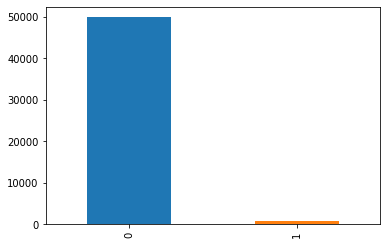

In [28]:
df['Claim'].value_counts().plot(kind='bar')

**Insights** 
1. Claim is highly imbalanced class. Techniques like over sampling or under sampling would be helpful.

In [41]:
numerical_cols = list(df._get_numeric_data().columns)
numerical_cols

['ID', 'Claim', 'Duration', 'Net Sales', 'Commision (in value)', 'Age']

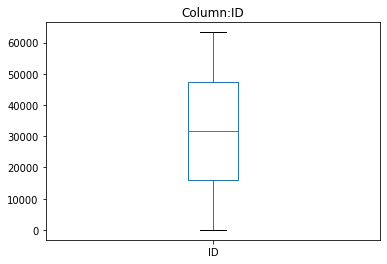

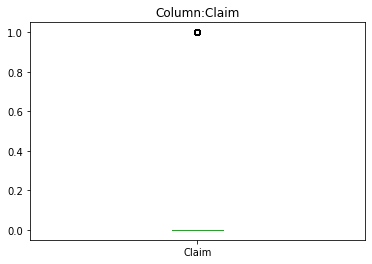

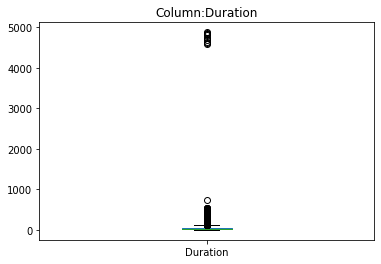

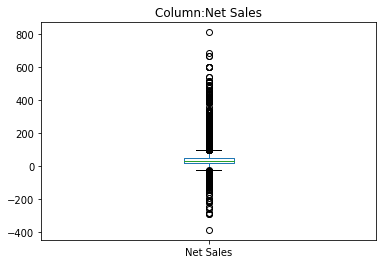

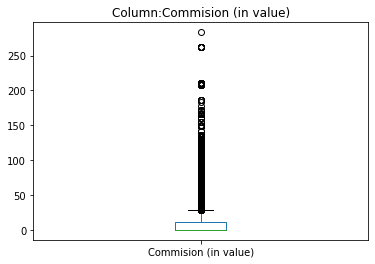

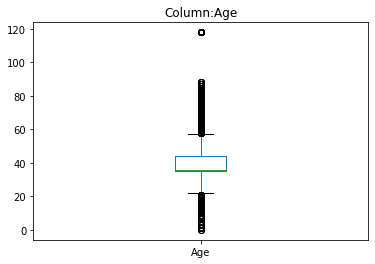

In [42]:
for col in numerical_cols:
    df[col].plot(kind='box')
    plt.title('Column:'+str(col))
    plt.show()

**Insights**
1. ID column is not useful as it is uniformly distributed. It is just an unique identifier.
2. 2nd boxplot shows that claim has only two values 0 and 1.
3. In 3rd boxplot, there are some rows with duration >=4500, they might be genuine outliers as we dont know the unit of duration given, This can be hours, minutes, days or anything.
4. There are some rows with negative net sales and zero as comission, these can be refunds. Hence they might be genuine outliers.
5. There are some rows with age = 0, these can be the age of infants, or babies with age <1 year.

In [45]:
def display_cat2cat(df, col1, col2):
    '''Function to plot paired box plot of 2 categorical columns'''
    plt.figure(figsize=(15,8))
    crosstab = pd.crosstab(index=df[col2], columns=df[col1])
    crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')
    plt.xticks(rotation = 90)
    plt.show()

<Figure size 1080x576 with 0 Axes>

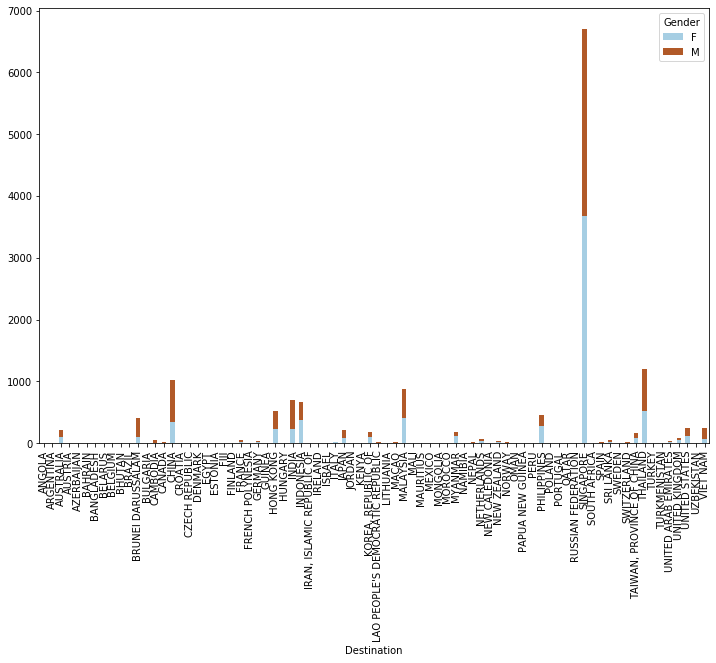

In [47]:
#Gender v/s Destination
display_cat2cat(df,'Gender','Destination')
plt.show()

**Insights**
1. Singapore has highes number of rows.


<Figure size 1080x576 with 0 Axes>

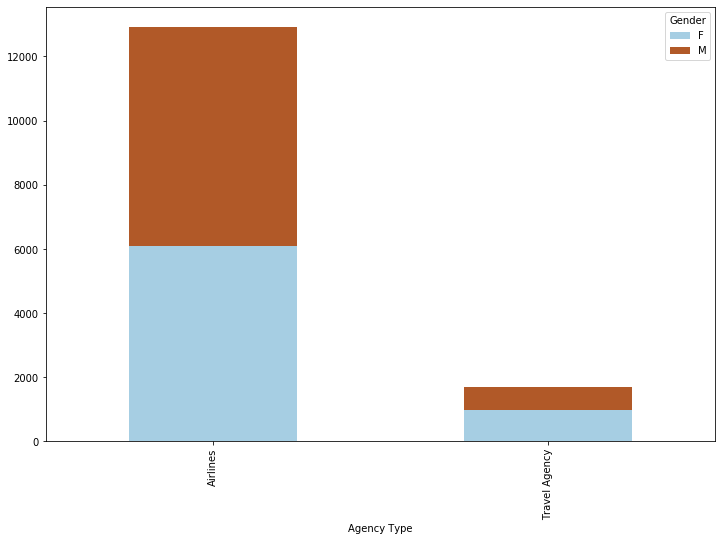

In [48]:
#Gender v/s Agency Type
display_cat2cat(df,'Gender','Agency Type')

**Insights**
1. Agency type is highly imbalanced class

<Figure size 1080x576 with 0 Axes>

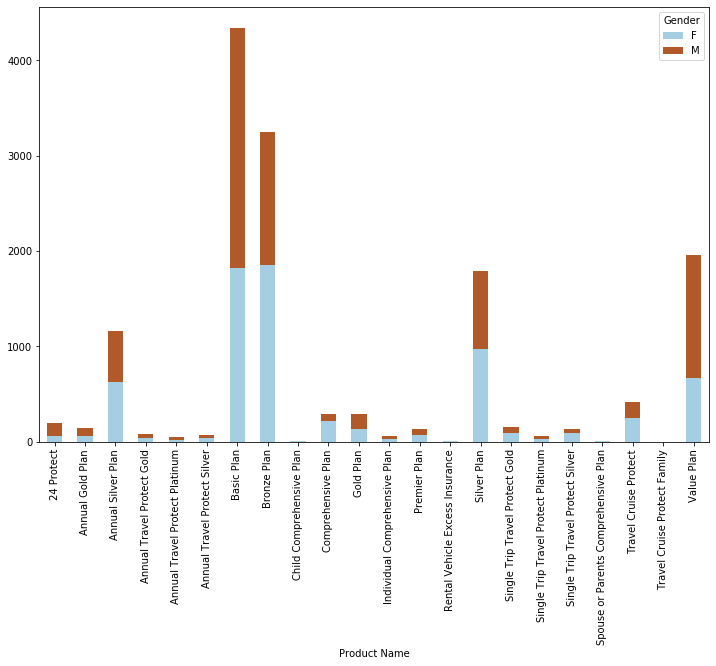

In [49]:
#Gender v/s Product
display_cat2cat(df,'Gender','Product Name')

**Insight**
1. Basic plan and Bronze plan are most famous.

<Figure size 1080x576 with 0 Axes>

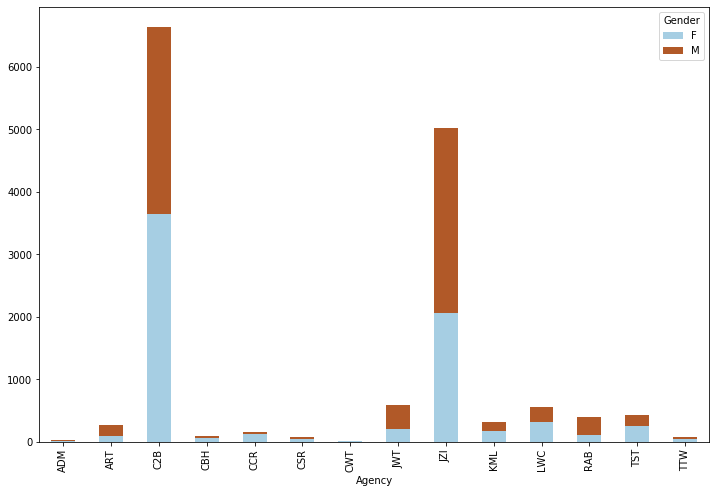

In [50]:
#Gender v/s Product
display_cat2cat(df,'Gender','Agency')

**Insights**
C2B agency and JZI agency are top two agencies.

<Figure size 1080x576 with 0 Axes>

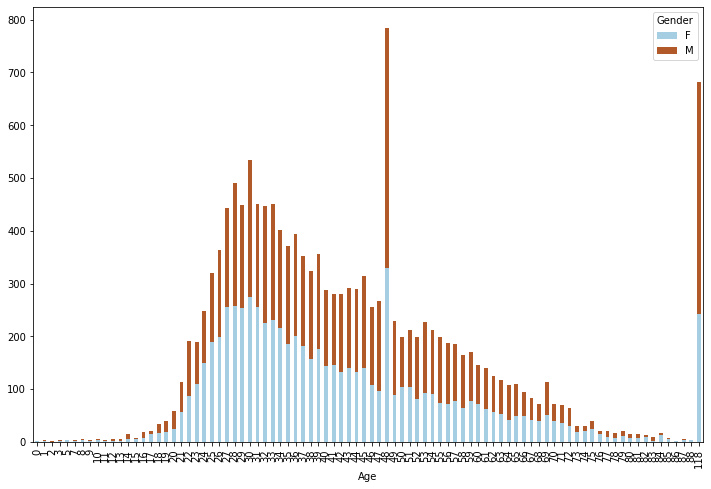

In [51]:
#Gender v/s Product
display_cat2cat(df,'Gender','Age')

**Insights**
21 to 51 is common age group

<Figure size 1080x576 with 0 Axes>

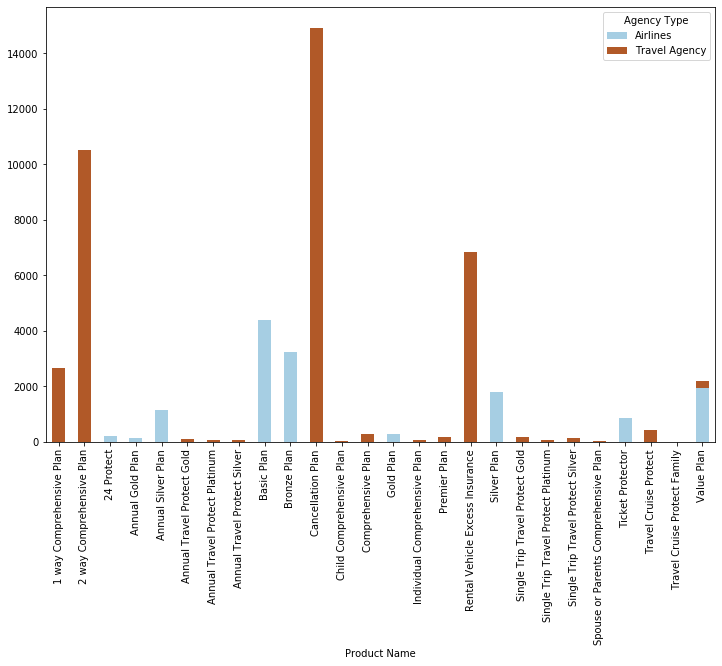

In [52]:
#Agency Type v/s Product Name
display_cat2cat(df,'Agency Type','Product Name')

**Insights**
1. Cancellation plan, 2 way comprehensive plan and rental vechicle excess isurance are most famous plans, and are distributed only through travel agencies.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
E:\ml\insurance_risk_analysis\packages\eda.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 3, 2))


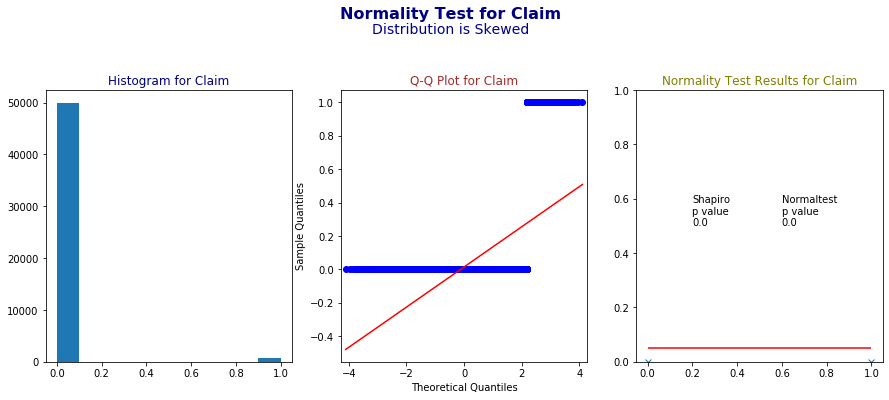

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
E:\ml\insurance_risk_analysis\packages\eda.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 3, 2))


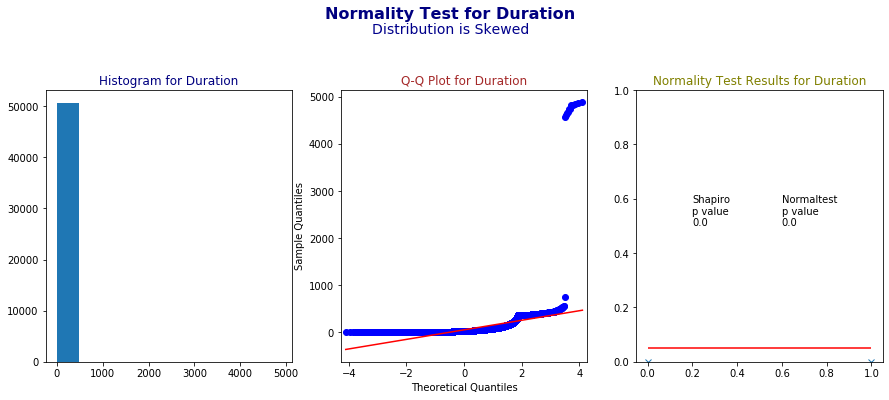

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
E:\ml\insurance_risk_analysis\packages\eda.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 3, 2))


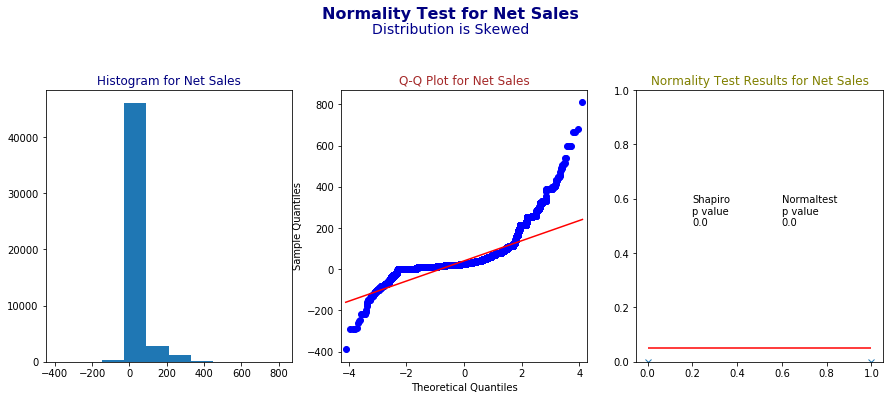

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
E:\ml\insurance_risk_analysis\packages\eda.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  qqplot(df[col], line='s', ax=plt.subplot(1, 3, 2))


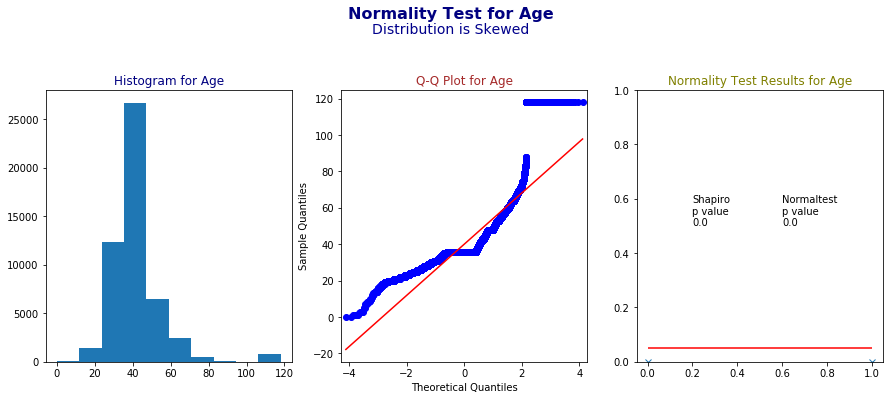

In [53]:
cols = ['Claim','Duration','Net Sales','Age']
for c in cols:
    normality_plots(df,c)

**Insights**
None of the plots look normal